# I. Data researching

In [57]:
import pandas as pd


train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
sample_submission = pd.read_csv("../dataset/sample_submission.csv")

In [58]:
# Describe Medhod
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


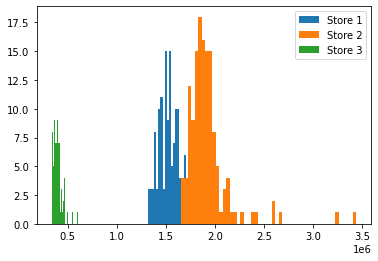

In [59]:
# Weekly_Sales by each store
import matplotlib.pyplot as plt

plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

# II. Data preprocessing

In [60]:
# Preprocess
train = train.fillna(0)
test = test.fillna(0)

def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

# train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0]) -> Because our dataset is `Weekly_Sales`.
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])
train = train.drop(columns=["Date"])

test['Month'] = test['Date'].apply(lambda x: date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x: date_encoder(x)[2])
test = test.drop(columns=["Date"])

train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012


In [61]:
# Promotion Scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train scaler by using `train.csv`.
scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
scaler.fit(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# transform DataFrame by using trained scaler.
train_scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
test_scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# Assign transformed values to new columns.
train[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3','Scaled_Promotion4','Scaled_Promotion5']] = train_scaled
test[['Scaled_Promotion1','Scaled_Promotion2','Scaled_Promotion3','Scaled_Promotion4','Scaled_Promotion5']] = test_scaled

# Remove previous columns.
train = train.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])
test = test.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

train

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,False,1643690.90,2,2010,-1.073164,-0.368901,-0.594771,-0.698219,-1.202488
1,2,1,38.51,2.548,8.106,True,1641957.44,2,2010,-1.073164,-0.368901,-0.594771,-0.698219,-1.202488
2,3,1,39.93,2.514,8.106,False,1611968.17,2,2010,-1.073164,-0.368901,-0.594771,-0.698219,-1.202488
3,4,1,46.63,2.561,8.106,False,1409727.59,2,2010,-1.073164,-0.368901,-0.594771,-0.698219,-1.202488
4,5,1,46.50,2.625,8.106,False,1554806.68,3,2010,-1.073164,-0.368901,-0.594771,-0.698219,-1.202488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,False,734297.87,8,2012,6.680635,-0.232000,1.427451,3.985635,0.188384
6251,6252,45,75.70,3.911,8.684,True,766512.66,9,2012,2.542600,-0.076847,0.550495,0.544925,-0.486275
6252,6253,45,67.87,3.948,8.684,False,702238.27,9,2012,2.668379,-0.368901,-0.501200,1.595159,0.633222
6253,6254,45,65.32,4.038,8.684,False,723086.20,9,2012,1.698962,1.736626,0.781376,0.894529,1.818309


# III. Modeling

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [63]:
# Data in `id` column does not affect training.
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# Divide `train.csv` into data for training and data for prediction.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

model.fit(x_train,y_train)

prediction = model.predict(test)
print('---------------------- Top 10 prediction --------------------\n')
print(prediction[:10])

---------------------- Top 10 prediction --------------------

[1620406.4163 1567864.9035 1463618.8245 1432857.8543 1793263.6832
 1804117.1062 1698762.0561 1713995.6362  437519.5649  431298.2462]


# IV. Submission

In [64]:
sample_submission['Weekly_Sales'] = prediction
sample_submission.head()
sample_submission.to_csv('../dataset/submissions/submission.csv', index = False)